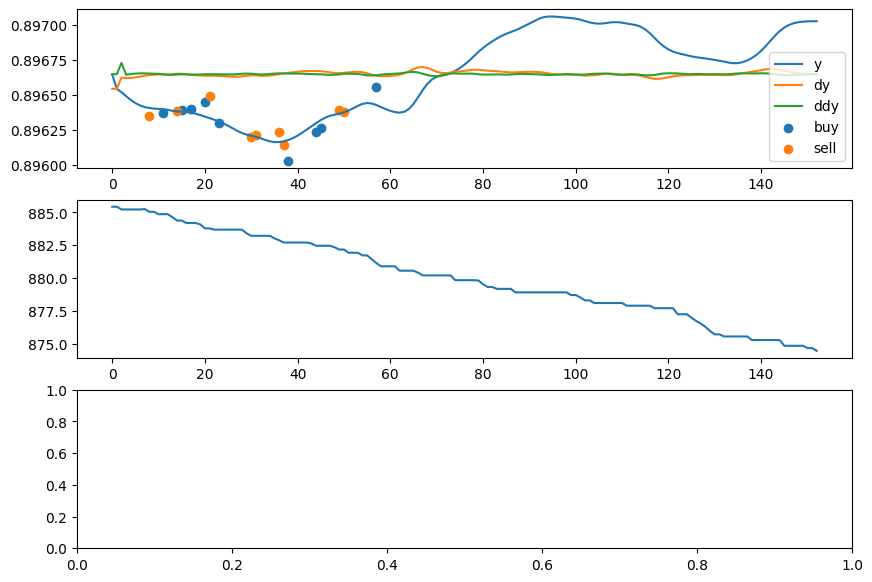

In [35]:
import json
import matplotlib.pyplot as plt
import numpy as np
from utils import smooth_ma, deriv
q = open("data.json")
f = json.load(q)
q.close()



y = smooth_ma(np.array(f['y'])[:200])
dy = deriv(y)
ddy = deriv(dy)

buy = f['bought'][1:10]
tbuy = f['tbought'][1:10]
sell = f['sold'][1:10]
tsell = f['tsold'][1:10]
bal = f['bal']
bal = np.array(bal)



fig, axis = plt.subplots(3,1, figsize=(10,7))
axis[1].plot(np.array(bal))


axis[0].plot(y,label='y')
axis[0].plot((dy + y.mean()),label='dy')
axis[0].plot((ddy + y.mean()),label='ddy')

s = 0
e = 9
axis[0].scatter(tbuy[s:e],buy[s:e], label='buy')
axis[0].scatter(tsell[s:e],sell[s:e], label='sell')
axis[0].legend()


- Setup environment for rllib
    * observation space
    * 